# Essay Workflow to check
- Language calrity
- calrity of thought
- analysis


In [76]:
from langgraph.graph import StateGraph, START,END
from langchain_openai import ChatOpenAI
from typing import TypedDict,Annotated
from pydantic import BaseModel, Field
from dotenv import load_dotenv
import operator
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
load_dotenv()

True

In [77]:
# schema to get structured output
class Schema(BaseModel):
    feedback :str = Field(description="feedback for the essay")
    score: int = Field(description='Score out of 10',ge=0,le=10)

In [ ]:
llm=ChatOpenAI(model='gpt-4o-mini')
llm_structure=llm.with_structured_output(Schema)

In [79]:
essay=""""""
with open('essay.txt','r') as file:
    essay=file.read()

In [80]:
type(essay)

str

In [81]:
essay

'Artificial Intelligence (AI) has rapidly advanced from simple rule-based systems to highly capable models that can understand, generate, and analyze complex information. One of the most promising developments in this field is Agentic AI. Unlike traditional AI, which mainly responds to inputs, Agentic AI is designed to take initiative, make decisions, and perform actions in a goal-directed manner.\n\nAgentic AI refers to AI systems that act like autonomous agents. These agents are not limited to answering questions or providing suggestions; instead, they can plan, reason, and interact with digital or physical environments to achieve objectives. For example, an Agentic AI can be given a business task such as analyzing customer feedback. Instead of just summarizing the data, the AI agent can decide which tools to use, gather additional information, create reports, and even suggest improvements for future strategies.\n\nThe key features of Agentic AI include autonomy, reasoning, and adapt

In [82]:
# create state
class EssayState(TypedDict):
    essay_text: str
    cot_feedback: str
    doa_feedback: str
    lang_feedback: str
    final_feedback:str
    avg_score: float
    individual_score: Annotated[list[int],operator.add]

In [83]:
# code for evaluate_language

def evaluate_language(state:EssayState)->EssayState:
    essay=state['essay_text']
    prompt=PromptTemplate.from_template(
        '''Evaluate the language quality of the following essay and provide short feedback and score out of 10.
        essay: \n {essay}'''
    )
    chain= prompt | llm_structure
    output=chain.invoke({
        'essay':essay
    })
    return {
        'lang_feedback':output.feedback,'individual_score':[output.score]
    }

In [84]:
# code for evaluate_analysis
def evaluate_analysis(state:EssayState)->EssayState:
    essay=state['essay_text']
    prompt=PromptTemplate.from_template(
        '''Evaluate the analysis of the following essay and provide short feedback and score out of 10.
        essay: \n {essay}'''
    )
    chain= prompt | llm_structure
    output=chain.invoke({
        'essay':essay
    })

    return {
        'doa_feedback':output.feedback,'individual_score':[output.score]
    }

In [85]:
# code for evaluate_thought
def evaluate_thought(state:EssayState)->EssayState:
    essay=state['essay_text']
    prompt=PromptTemplate.from_template(
        '''Evaluate the clarity thought of the following essay and provide short feedback and score out of 10.
        essay: \n {essay}'''
    )
    chain= prompt | llm_structure
    output=chain.invoke({
        'essay':essay
    })

    return {
        'cot_feedback':output.feedback,'individual_score':[output.score]
    }

In [86]:
# code for final_feedback
def final_feedback(state:EssayState)->EssayState:
    evaluate_language=state['lang_feedback']
    cot_feedback=state['cot_feedback']
    dot_feedback=state['doa_feedback']
    prompt=PromptTemplate.from_template("Based on the followig feedbakcs provide a summarized final feedback \n language feedback :{evaluate_language} \n clarity of thought feedback: {evaluate_language} \n analysis feedback : {dot_feedback}")
    chain=prompt | llm |StrOutputParser()
    final_feedback=chain.invoke({'evaluate_language':evaluate_language,
                                 'cot_feedback':cot_feedback,
                                 'dot_feedback':dot_feedback})
    avg_score=sum(state['individual_score'])/len(state['individual_score'])
    return {
        'final_feedback':final_feedback,
        'avg_score':avg_score
    }

In [87]:
graph=StateGraph(EssayState)

graph.add_node('evaluate_language',evaluate_language)
graph.add_node('evaluate_analysis',evaluate_analysis)
graph.add_node('evaluate_thought',evaluate_thought)
graph.add_node('final_feedback',final_feedback)

graph.add_edge(START,'evaluate_language')
graph.add_edge(START,'evaluate_analysis')
graph.add_edge(START,'evaluate_thought')

graph.add_edge('evaluate_language','final_feedback')
graph.add_edge('evaluate_analysis','final_feedback')
graph.add_edge('evaluate_thought','final_feedback')

graph.add_edge('final_feedback',END)

workflow=graph.compile()


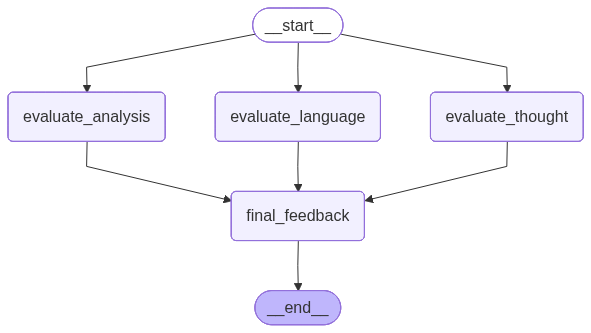

In [88]:
workflow

In [89]:
result=workflow.invoke({
    'essay_text':essay
})

In [90]:
result

{'essay_text': 'Artificial Intelligence (AI) has rapidly advanced from simple rule-based systems to highly capable models that can understand, generate, and analyze complex information. One of the most promising developments in this field is Agentic AI. Unlike traditional AI, which mainly responds to inputs, Agentic AI is designed to take initiative, make decisions, and perform actions in a goal-directed manner.\n\nAgentic AI refers to AI systems that act like autonomous agents. These agents are not limited to answering questions or providing suggestions; instead, they can plan, reason, and interact with digital or physical environments to achieve objectives. For example, an Agentic AI can be given a business task such as analyzing customer feedback. Instead of just summarizing the data, the AI agent can decide which tools to use, gather additional information, create reports, and even suggest improvements for future strategies.\n\nThe key features of Agentic AI include autonomy, reaso